In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [11]:
# Load features 
features_path = "../data/preprocessed_features.csv"
features_df = pd.read_csv(features_path)

# drop participants id
features_df = features_df.drop(columns=["participants"])

In [12]:
#define PCA model to use
n_components=15
pca = PCA(n_components=n_components)

#fit PCA model to data
pca_fit = pca.fit(features_df)

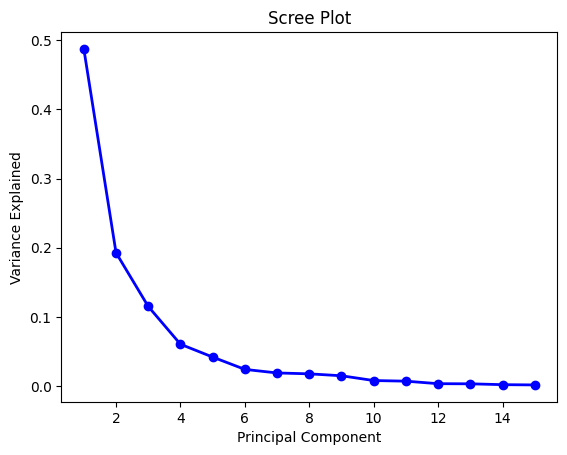

In [13]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

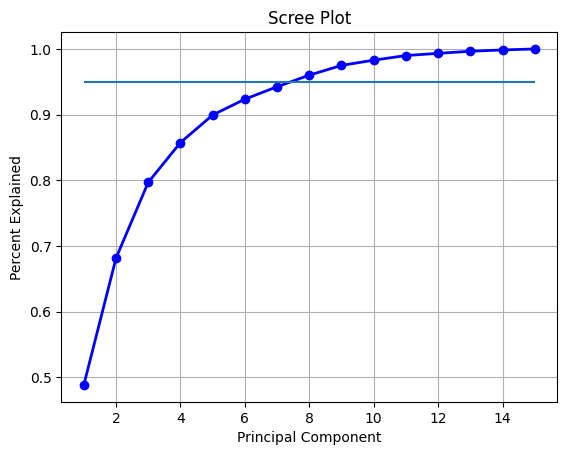

In [14]:
percent_explained = np.cumsum(pca.explained_variance_ratio_)/np.sum(pca.explained_variance_ratio_)
plt.plot(PC_values, percent_explained, 'o-', linewidth=2, color='blue')
plt.hlines(0.95,1,15)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Percent Explained')
plt.grid()
plt.show()

In [15]:
# Determine minimum number of features to represent over 95%
num_features = len(percent_explained) - np.count_nonzero(percent_explained - 0.95>0) + 1 
print(f"Number of features: {num_features}")

Number of features: 8


In [16]:
num_features

8

In [17]:
# Grab important features 
column_names = [f'PC{i+1}' for i in range(n_components)] 
X_pca = pca.fit_transform(features_df)
pca_features = pd.DataFrame(X_pca[:,:num_features], columns=column_names[:num_features])

# save pca features
pca_features.to_csv("../data/pca_features.csv", index=False)